## **ASSIGNMENT OF PROGRAMMING OF AI**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

**Q1: Outlier Detection and Feature Reduction**

In [ ]:
# Loading dataset
df = pd.read_csv("patient_data.csv")

# Remove constant features
numeric_df = df.select_dtypes(include=[np.number])
selector = VarianceThreshold(threshold=0.0)
reduced_numeric_df = numeric_df[numeric_df.columns[selector.fit(numeric_df).get_support(indices=True)]]

# Combine numeric and non-numeric
non_numeric_df = df.select_dtypes(exclude=[np.number])
df_reduced = pd.concat([reduced_numeric_df, non_numeric_df], axis=1)

# Outlier detection using Z-score method
z_scores = np.abs(stats.zscore(df_reduced["CholesterolLevel"]))
df_no_outliers = df_reduced[z_scores < 3]

# Replaceing missing values (if there exists any)
df_cleaned = df_no_outliers.fillna(df_no_outliers.median(numeric_only=True))
df_cleaned.head()

,PatientID,Age,CholesterolLevel,BloodPressure,Gender,Region,RiskCategory
0,1,37,193.4,129.4,Male,East,High
1,2,45,210.7,107.1,Female,West,Low
2,3,63,244.3,103.9,Male,West,Low
3,4,53,184.5,127.2,Male,West,High
4,5,29,175.7,116.6,Male,South,High


**Q2: Data Visualization**

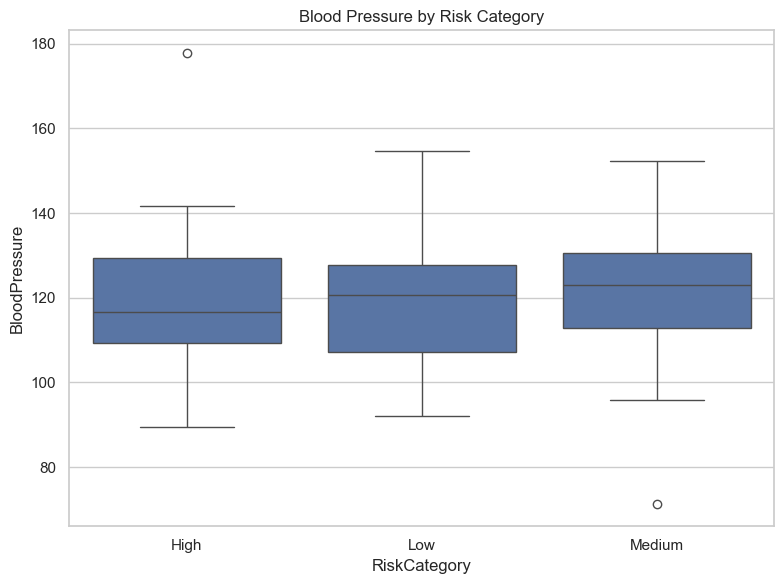

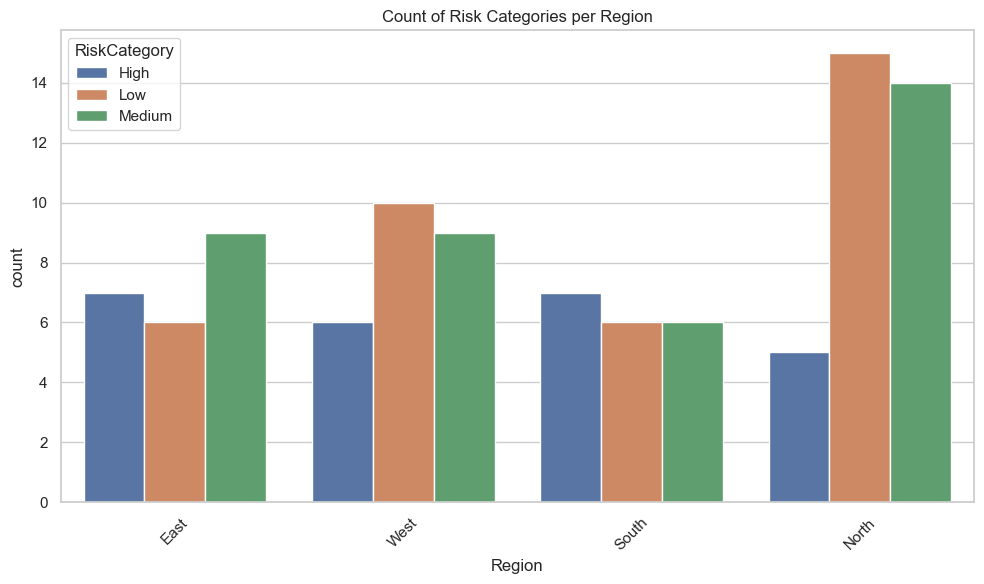

In [ ]:
sns.set(style="whitegrid")

# Box ploting
plt.figure(figsize=(8, 6))
sns.boxplot(x='RiskCategory', y='BloodPressure', data=df_cleaned)
plt.title('Blood Pressure by Risk Category')
plt.tight_layout()
plt.show()

# Count ploting
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Region', hue='RiskCategory')
plt.title('Count of Risk Categories per Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Q3: Statistical Hypothesis Testing**

In [ ]:
from scipy.stats import ttest_1samp, chi2_contingency

# One-sample T-test
sample = df_cleaned["CholesterolLevel"].sample(20, random_state=42)
t_stat, p_val_ttest = ttest_1samp(sample, 200)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val_ttest:.3f}")
if p_val_ttest < 0.05:
    print("Reject the null hypothesis: Cholesterol level is significantly different from 200.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 200.")

# Chi-square test
contingency_table = pd.crosstab(df_cleaned["Region"], df_cleaned["RiskCategory"])
chi2_stat, p_val_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"Chi²-statistic: {chi2_stat:.3f}, P-value: {p_val_chi2:.3f}")
if p_val_chi2 < 0.05:
    print("Reject the null hypothesis: Region and RiskCategory are related.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

T-statistic: 0.547, P-value: 0.591
Fail to reject the null hypothesis: No significant difference from 200.
Chi²-statistic: 4.538, P-value: 0.604
Fail to reject the null hypothesis: No significant relationship.


**Q4: Modeling a Health System with ODE**

**Equation:**

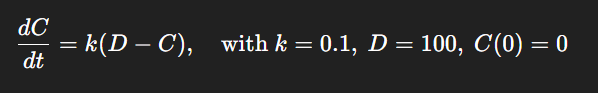

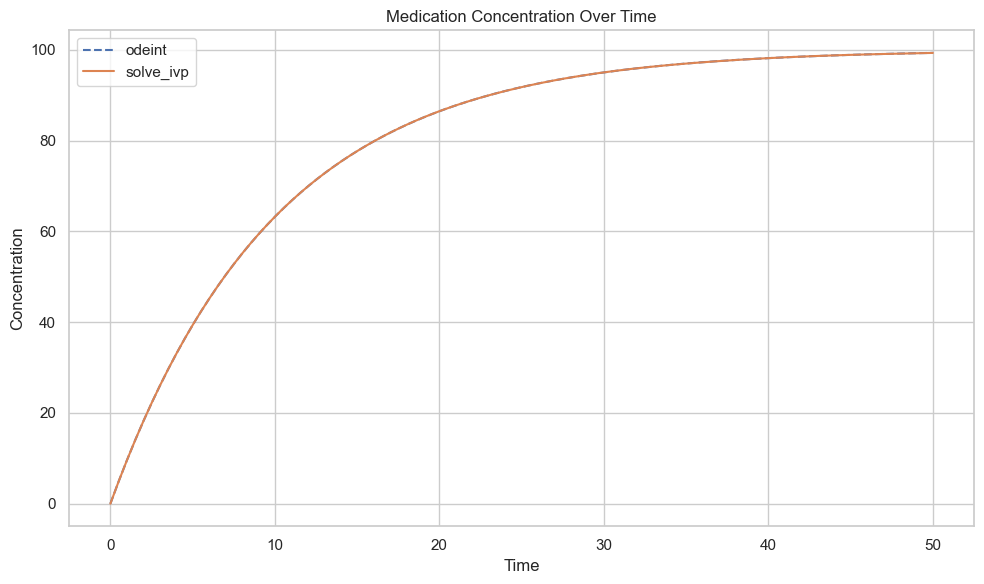

In [ ]:
from scipy.integrate import odeint, solve_ivp

def model(C, t, k, D):
    return k * (D - C)

k = 0.1
D = 100
C0 = 0
t = np.linspace(0, 50, 200)
C_odeint = odeint(model, C0, t, args=(k, D))

def model_ivp(t, C):
    return k * (D - C)

sol_ivp = solve_ivp(model_ivp, [0, 50], [C0], t_eval=t)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, C_odeint, label="odeint", linestyle="--")
plt.plot(sol_ivp.t, sol_ivp.y[0], label="solve_ivp", linestyle="-")
plt.title("Medication Concentration Over Time")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()